# **Análise e Exploração dos Dados**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('olist_order_reviews_dataset.csv')

### 1. Análise da Distribuição das Notas (Ratings)

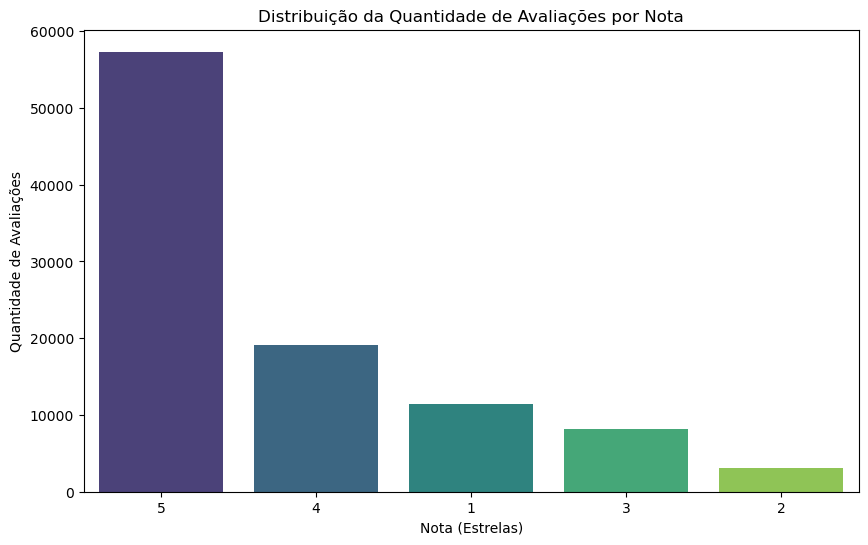

In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(x='review_score', data=df, palette='viridis', order=df['review_score'].value_counts().index)
plt.title('Distribuição da Quantidade de Avaliações por Nota')
plt.xlabel('Nota (Estrelas)')
plt.ylabel('Quantidade de Avaliações')
plt.show()

### 2. Análise da Variável Alvo (Sentimento)

C:\Users\Pichau\AppData\Local\Temp\ipykernel_19844\841186369.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binario['sentimento'] = df_binario['sentimento'].astype(int)


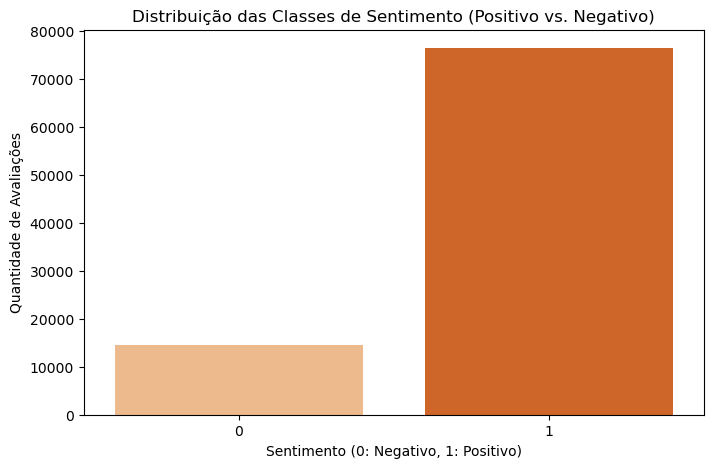

In [4]:
df['sentimento'] = df['review_score'].apply(lambda x: 1 if x >= 4 else (0 if x <= 2 else None))

df_binario = df.dropna(subset=['sentimento'])
df_binario['sentimento'] = df_binario['sentimento'].astype(int)

plt.figure(figsize=(8, 5))
sns.countplot(x='sentimento', data=df_binario, palette='Oranges')
plt.title('Distribuição das Classes de Sentimento (Positivo vs. Negativo)')
plt.xlabel('Sentimento (0: Negativo, 1: Positivo)')
plt.ylabel('Quantidade de Avaliações')
plt.show()

### 3. Análise do Conteúdo Textual com Nuvens de Palavras (Word Clouds)

C:\Users\Pichau\AppData\Local\Temp\ipykernel_19844\3407302060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binario['texto_completo'] = df_binario['review_comment_title'].fillna('') + ' ' + df_binario['review_comment_message'].fillna('')


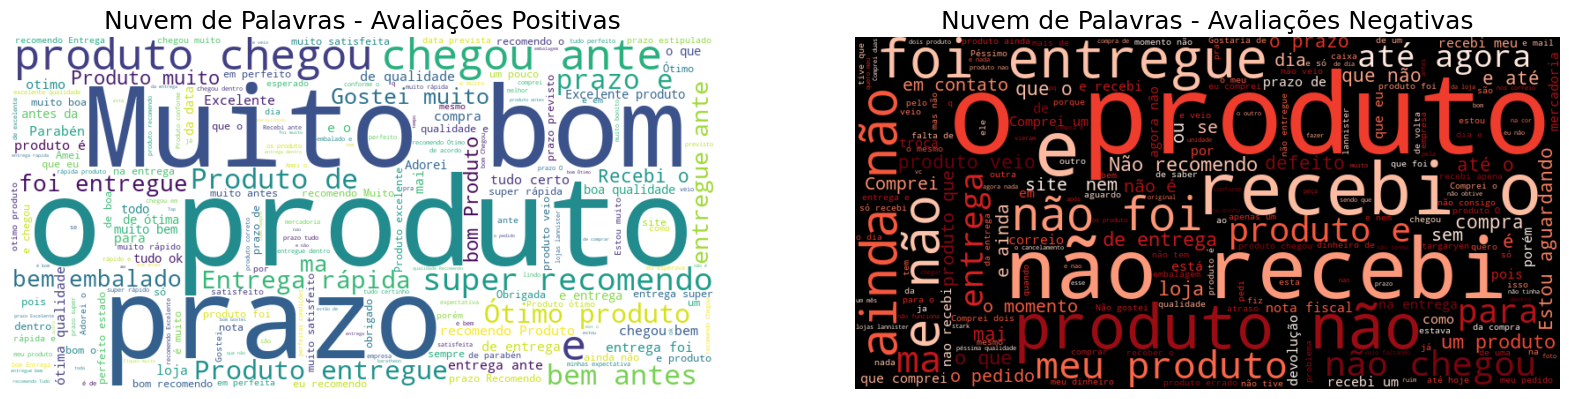

In [5]:

df_binario['texto_completo'] = df_binario['review_comment_title'].fillna('') + ' ' + df_binario['review_comment_message'].fillna('')

textos_positivos = " ".join(review for review in df_binario[df_binario['sentimento'] == 1]['texto_completo'].astype(str))
textos_negativos = " ".join(review for review in df_binario[df_binario['sentimento'] == 0]['texto_completo'].astype(str))

# Gerando a nuvem de palavras para reviews positivos
wordcloud_pos = WordCloud(background_color="white", width=800, height=400).generate(textos_positivos)

# Gerando a nuvem de palavras para reviews negativos
wordcloud_neg = WordCloud(background_color="black", colormap="Reds", width=800, height=400).generate(textos_negativos)

# Plotando os resultados
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].set_title('Nuvem de Palavras - Avaliações Positivas', fontsize=18)
axes[0].axis('off')

axes[1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1].set_title('Nuvem de Palavras - Avaliações Negativas', fontsize=18)
axes[1].axis('off')

plt.show()

### 4. Análise do Comprimento das Avaliações

C:\Users\Pichau\AppData\Local\Temp\ipykernel_19844\2002610765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binario['texto_completo'] = df_binario['review_comment_title'].fillna('') + ' ' + df_binario['review_comment_message'].fillna('')
C:\Users\Pichau\AppData\Local\Temp\ipykernel_19844\2002610765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binario['num_palavras'] = df_binario['texto_completo'].astype(str).apply(lambda x: len(x.split()))
c:\Users\Pichau\anaconda3\Lib\site-packages\seabo

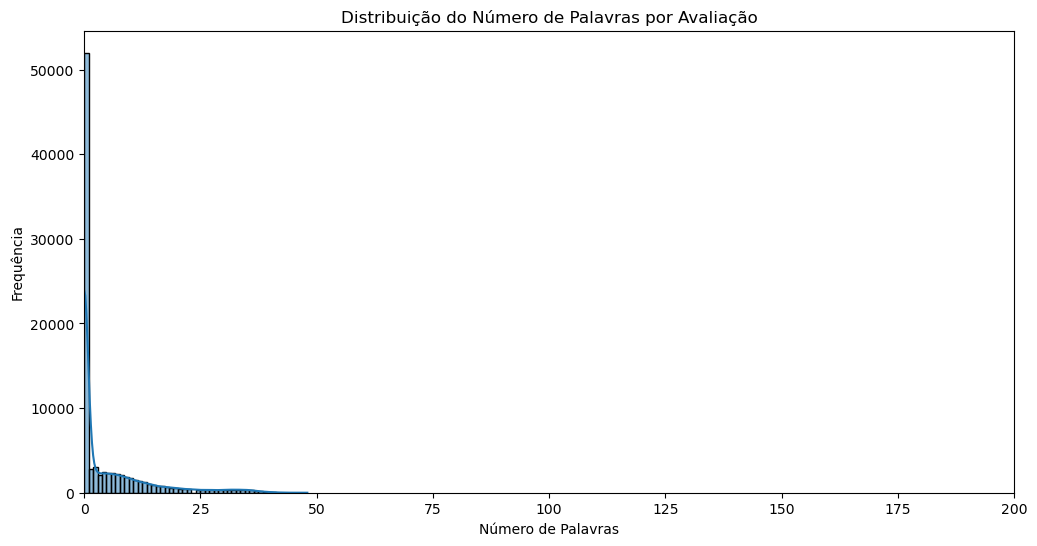

In [6]:
df_binario['texto_completo'] = df_binario['review_comment_title'].fillna('') + ' ' + df_binario['review_comment_message'].fillna('')

df_binario['num_palavras'] = df_binario['texto_completo'].astype(str).apply(lambda x: len(x.split()))

# Plotando o histograma
plt.figure(figsize=(12, 6))
sns.histplot(data=df_binario, x='num_palavras', bins=50, kde=True)
plt.title('Distribuição do Número de Palavras por Avaliação')
plt.xlabel('Número de Palavras')
plt.ylabel('Frequência')
plt.xlim(0, 200)
plt.show()

### 4. Processamento/Tratamento de Dados

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import spacy
from nltk.corpus import stopwords
from unidecode import unidecode

nlp = spacy.load("pt_core_news_sm")
stopwords_pt = set(stopwords.words('portuguese'))

def preprocessar_texto(texto):
    if not isinstance(texto, str):
        return []
    texto = texto.lower()
    texto = re.sub(r'\d+', '', texto)
    texto = re.sub(r'[^\w\s]', '', texto)
    texto = unidecode(texto)
    doc = nlp(texto)
    tokens_processados = [
        token.lemma_ 
        for token in doc 
        if token.text not in stopwords_pt and not token.is_space and len(token.text) > 2
    ]
    return tokens_processados

nome_do_arquivo = 'olist_order_reviews_dataset.csv'
df = pd.read_csv(nome_do_arquivo)

df['texto_completo'] = df['review_comment_title'].fillna('') + ' ' + df['review_comment_message'].fillna('')

df['sentimento'] = df['review_score'].apply(lambda x: 1 if x >= 4 else (0 if x <= 2 else None))
df_binario = df.dropna(subset=['sentimento', 'texto_completo'])
df_binario = df_binario[df_binario['texto_completo'].str.strip() != '']
df_binario['sentimento'] = df_binario['sentimento'].astype(int)

print("Iniciando pré-processamento... Isso pode levar alguns minutos.")
df_binario['texto_processado'] = df_binario['texto_completo'].apply(preprocessar_texto)
print("Pré-processamento concluído.")

Iniciando pré-processamento... Isso pode levar alguns minutos.
Pré-processamento concluído.


------------------------------------------------------------------------------------------------------------------------------------------

# 6. Preparação dos Dados e Aplicação dos Modelos de Aprendizado de Máquina


In [8]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.naive_bayes import MultinomialNB

### 6.1. Divisão dos Dados em Conjuntos de Treino e Teste

O conjunto de dados foi dividido em dois subconjuntos: treinamento (80%) e teste (20%). O conjunto de treinamento é utilizado para ensinar o modelo a reconhecer os padrões associados a cada sentimento. O conjunto de teste, por sua vez, é mantido separado e utilizado apenas ao final do processo para avaliar a capacidade de generalização do modelo em dados nunca vistos, fornecendo uma estimativa imparcial de seu desempenho. Para efetuar essa tarefa foi utilizado a função “train_test_split” da biblioteca Scikit-learn. A opção “stratify=y” foi utilizada para garantir que a proporção de avaliações.

In [9]:
print("Dividindo os dados em conjuntos de treino e teste...")

X = df_binario['texto_processado']
y = df_binario['sentimento']

X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, 
    y, 
    test_size=0.20,      
    random_state=42,     
    stratify=y
)

print("Dados divididos com sucesso!")
print(f"Tamanho do conjunto de treino: {len(X_treino)} amostras")
print(f"Tamanho do conjunto de teste: {len(X_teste)} amostras")


Dividindo os dados em conjuntos de treino e teste...
Dados divididos com sucesso!
Tamanho do conjunto de treino: 31235 amostras
Tamanho do conjunto de teste: 7809 amostras


### 6.2. Preparação e Extração de Atributos

O próximo passo é converter as listas de tokens textuais em vetores numéricos que possam ser interpretados pelos algoritmos

#### 6.2.1. Vetorização com TF-IDF para Modelos Clássicos

Para o modelo Naïve Bayes, foi a utilizado para a técnica TF-IDF (Term Frequency-Inverse Document Frequency). A abordagem utilizada representa cada avaliação como um vetor numérico onde cada posição corresponde a uma palavra do vocabulário. O valor em cada posição não é apenas a contagem da palavra, mas um peso que reflete a importância daquela palavra no contexto da avaliação e de todo o cojunto de dados. Palavras que são frequentes em uma avaliação, mas são raras no geral recebem um peso maior, enquanto palavras muito comuns em todas as avaliações recebem um peso menor

In [10]:
X_treino_texto = X_treino.apply(lambda tokens: ' '.join(tokens))
X_teste_texto = X_teste.apply(lambda tokens: ' '.join(tokens))

vectorizer = TfidfVectorizer(max_features=5000)

X_treino_tfidf = vectorizer.fit_transform(X_treino_texto)

X_teste_tfidf = vectorizer.transform(X_teste_texto)


Criação do dataframe para visualizar a matriz TF-IDF

In [11]:
X_treino = pd.Series([['produto', 'bom', 'recomendo'], ['entrega', 'demorou', 'nao', 'gostei']])
X_teste = pd.Series([['bom', 'atendimento'], ['pessimo', 'nao', 'recomendo']])

X_treino_texto = X_treino.apply(lambda tokens: ' '.join(tokens))
X_teste_texto = X_teste.apply(lambda tokens: ' '.join(tokens))

vectorizer = TfidfVectorizer(max_features=5000)

X_treino_tfidf = vectorizer.fit_transform(X_treino_texto)

X_teste_tfidf = vectorizer.transform(X_teste_texto)

print("--- Ilustração do Resultado do TF-IDF ---")

print(f"Formato da Matriz TF-IDF: {X_treino_tfidf.shape}")

df_tfidf = pd.DataFrame(X_treino_tfidf[:5].toarray(), columns=vectorizer.get_feature_names_out())

print("\nAmostra da Matriz TF-IDF (5 primeiras avaliações):")

print(df_tfidf.head().T)

--- Ilustração do Resultado do TF-IDF ---
Formato da Matriz TF-IDF: (2, 7)

Amostra da Matriz TF-IDF (5 primeiras avaliações):
                 0    1
bom        0.57735  0.0
demorou    0.00000  0.5
entrega    0.00000  0.5
gostei     0.00000  0.5
nao        0.00000  0.5
produto    0.57735  0.0
recomendo  0.57735  0.0


#### 6.2.2. Tokenização e Padding para Modelos de Deep Learning


Modelos como o LSTM exigem um formato de entrada diferente, os dados são processados como uma sequência de inteiros, onde cada inteiro representa um token específico no vocabulário, e todas as sequências devem ter o mesmo comprimento.

1. Codificação para Inteiros: Cada palavra única no conjunto de treinamento é mapeada para um número inteiro.

2. Padding: As sequências de inteiros são preenchidos com zeros, ou truncadas, para que todas atinjam um comprimento fixo, definido com base na análise da distrubuição do comprimento dos textos.

In [12]:
VOCAB_SIZE = 10000
MAX_LENGTH = 100

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>')
tokenizer.fit_on_texts(X_treino)

X_treino_seq = tokenizer.texts_to_sequences(X_treino)
X_teste_seq = tokenizer.texts_to_sequences(X_teste)

X_treino_pad = pad_sequences(X_treino_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')
X_teste_pad = pad_sequences(X_teste_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')

### 6.3. Aplicação e Treinamento dos Modelos

#### 6.3.1. Modelo de Baseline - Naïve Bayes

Este algoritmo é uma escolha clássica eficiente para classificação de texto, baseando-se no Teorema de Bayes para calcular a probabilidade de uma avaliação pertencer a uma classe, positiva ou negativa, dada a frequência das palvras que ela contém.

In [16]:
print("--- Iniciando a preparação para o modelo Naïve Bayes ---")

X = df_binario['texto_processado']
y = df_binario['sentimento']

X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, 
    y, 
    test_size=0.20, 
    random_state=42, 
    stratify=y
)
print("Dados divididos em treino e teste.")

X_treino_texto = X_treino.apply(lambda tokens: ' '.join(tokens))
X_teste_texto = X_teste.apply(lambda tokens: ' '.join(tokens))

vectorizer = TfidfVectorizer(max_features=5000)
X_treino_tfidf = vectorizer.fit_transform(X_treino_texto)
X_teste_tfidf = vectorizer.transform(X_teste_texto)
print("Textos vetorizados com TF-IDF.")
print(f"Formato da matriz de treino: {X_treino_tfidf.shape}")

print("\nTreinando o modelo Naïve Bayes...")

modelo_nb = MultinomialNB()

modelo_nb.fit(X_treino_tfidf, y_treino)

print("Modelo Naïve Bayes treinado com sucesso!")

--- Iniciando a preparação para o modelo Naïve Bayes ---
Dados divididos em treino e teste.
Textos vetorizados com TF-IDF.
Formato da matriz de treino: (31235, 5000)

Treinando o modelo Naïve Bayes...
Modelo Naïve Bayes treinado com sucesso!


#### 6.3.2. Modelo de Deep Learning - LSTM


Para a utilização do LSTM, foi implementada uma Rede Neural Recorrente com uma camada de LSTM (Long Short-Term Memory). LSTMs são projetadas para aprender dependências de longo prazo e capturar o contexto sequencial em textos, o que pode funcionar melhor do que modelos Bag of Word como o Naïve Bayes.

Arquitetura da modelo foi definida com as seguintes camadas:

1. Camada de Embedding: Transforma os inteiros de entrada em vetores densos de significado
2. Camada LSTM: Processa a sequência de vetores para captura o contexto
3. Camada Densa: Produz a classificação final, 0 ou 1, com uma função de ativação sigmoide.

In [ ]:
print("--- Iniciando a preparação dos dados para o LSTM ---")

VOCAB_SIZE = 10000
MAX_LENGTH = 100 

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>')
tokenizer.fit_on_texts(X_treino)

X_treino_seq = tokenizer.texts_to_sequences(X_treino)
X_teste_seq = tokenizer.texts_to_sequences(X_teste)

X_treino_pad = pad_sequences(X_treino_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')
X_teste_pad = pad_sequences(X_teste_seq, maxlen=MAX_LENGTH, padding='post', truncating='post')

print(f"Dados preparados para o formato do LSTM. Shape da matriz de treino: {X_treino_pad.shape}")


modelo_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=32, input_length=MAX_LENGTH),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

modelo_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print("\nArquitetura do Modelo LSTM:")
modelo_lstm.summary()

print("\nIniciando o treinamento do modelo LSTM...")
historico = modelo_lstm.fit(
    X_treino_pad, 
    y_treino.values,
    epochs=5, 
    validation_data=(X_teste_pad, y_teste.values),
    batch_size=64
)

print("Modelo LSTM treinado com sucesso!")

--- Iniciando a preparação dos dados para o LSTM ---
Dados preparados para o formato do LSTM. Shape da matriz de treino: (31235, 100)

Arquitetura do Modelo LSTM:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 32)           320000    
                                                                 
 lstm_2 (LSTM)               (None, 64)                24832     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 344897 (1.32 MB)
Trainable params: 344897 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Iniciando o treinamento do modelo LSTM...
Epoch 1/5
489/489 [==============================] - 18s 32ms/step - loss: 0

### 7. Avaliação dos Modelos de Aprendizado de Máquina e Discussão dos Resultados

245/245 [==============================] - 2s 7ms/step
Resultados do Modelo Naïve Bayes
Relatório de Classificação (Naïve Bayes):
              precision    recall  f1-score   support

Negativo (0)       0.86      0.86      0.86      2199
Positivo (1)       0.95      0.95      0.95      5610

    accuracy                           0.92      7809
   macro avg       0.90      0.91      0.90      7809
weighted avg       0.92      0.92      0.92      7809

Matriz de Confusão (Naïve Bayes):


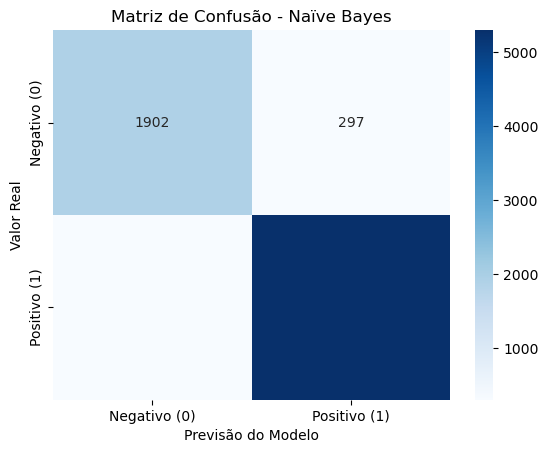


Resultados do Modelo LSTM
Relatório de Classificação (LSTM):
              precision    recall  f1-score   support

Negativo (0)       0.00      0.00      0.00      2199
Positivo (1)       0.72      1.00      0.84      5610

    accuracy                           0.72      7809
   macro avg       0.36      0.50      0.42      7809
weighted avg       0.52      0.72      0.60      7809

Matriz de Confusão (LSTM):


c:\Users\Pichau\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Pichau\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Pichau\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


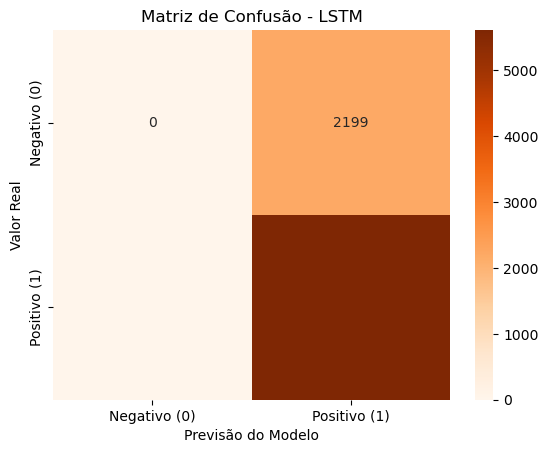


Tabela Comparativa de Resultados
             Acurácia  Precisão    Recall  F1-Score
Naïve Bayes  0.922525  0.946955  0.945098  0.946026
LSTM         0.718402  0.718402  1.000000  0.836128


In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred_nb = modelo_nb.predict(X_teste_tfidf)

y_pred_prob_lstm = modelo_lstm.predict(X_teste_pad)
y_pred_lstm = (y_pred_prob_lstm > 0.5).astype("int32").flatten()

nomes_classes = ['Negativo (0)', 'Positivo (1)']

print("="*50)
print("Resultados do Modelo Naïve Bayes")
print("="*50)

print("Relatório de Classificação (Naïve Bayes):")
print(classification_report(y_teste, y_pred_nb, target_names=nomes_classes))

print("Matriz de Confusão (Naïve Bayes):")
matriz_nb = confusion_matrix(y_teste, y_pred_nb)

sns.heatmap(matriz_nb, annot=True, fmt='d', cmap='Blues', xticklabels=nomes_classes, yticklabels=nomes_classes)
plt.title('Matriz de Confusão - Naïve Bayes')
plt.xlabel('Previsão do Modelo')
plt.ylabel('Valor Real')
plt.show()

print("\n"+"="*50)
print("Resultados do Modelo LSTM")
print("="*50)

print("Relatório de Classificação (LSTM):")
print(classification_report(y_teste, y_pred_lstm, target_names=nomes_classes))

print("Matriz de Confusão (LSTM):")
matriz_lstm = confusion_matrix(y_teste, y_pred_lstm)
sns.heatmap(matriz_lstm, annot=True, fmt='d', cmap='Oranges', xticklabels=nomes_classes, yticklabels=nomes_classes)
plt.title('Matriz de Confusão - LSTM')
plt.xlabel('Previsão do Modelo')
plt.ylabel('Valor Real')
plt.show()

metricas = {
    'Naïve Bayes': {
        'Acurácia': accuracy_score(y_teste, y_pred_nb),
        'Precisão': precision_score(y_teste, y_pred_nb),
        'Recall': recall_score(y_teste, y_pred_nb),
        'F1-Score': f1_score(y_teste, y_pred_nb)
    },
    'LSTM': {
        'Acurácia': accuracy_score(y_teste, y_pred_lstm),
        'Precisão': precision_score(y_teste, y_pred_lstm),
        'Recall': recall_score(y_teste, y_pred_lstm),
        'F1-Score': f1_score(y_teste, y_pred_lstm)
    }
}

df_resultados = pd.DataFrame(metricas).T 

print("\n"+"="*50)
print("Tabela Comparativa de Resultados")
print("="*50)
print(df_resultados)